In [1]:
import numpy as np
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import mean_squared_error

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import Data
- import engineered dataset
- encode categorical features
- create scoring function
- perform train-test split

In [3]:
homes_raw = pd.read_csv('../akram/1 - EDA/df_engineered.csv', index_col=0)
prices = homes_raw.SalePrice
logprices = homes_raw.logSalePrice

homes_raw.head()

PID    DateSold  SalePrice  logSalePrice    Rate  LotArea  GrLivArea  \
1  904302020  2006-01-01      80000      4.903090  4.4106     5220        879   
2  532378050  2006-01-01     120875      5.082336  4.4106    13052       1024   
3  534275010  2006-01-01     136500      5.135133  4.4106    10659       1050   
4  531363080  2006-01-01     139500      5.144574  4.4106     7733       1142   
5  535304020  2006-01-01     139500      5.144574  4.4106    12778       1008   

  Neighborhood  Neighborhood_Int  MSZoning_Int  CentralAir  Age  \
1        SWISU                 6             6           1   70   
2       Sawyer                 8             6           1   41   
3        NAmes                11             6           1   45   
4      SawyerW                13             6           1    1   
5        NAmes                11             6           1   54   

   RemodSinceBuilt  StreetAlley  LotShape  LandContour  LandSlope  LotConfig  \
1               14            1         1            1          0          1   
2                0            1         1            1          0          4   
3                0            1         1            1          0          1   
4                0            1         1            1          0          1   
5               51            1         0            1          0          1   

   IsOnMainroad  IsNearRailroad  IsNearPark   MSSubClass MSZoning BldgType  \
1             0               0           0  Dwelling_30       RL     1Fam   
2             0               0           0  Dwelling_20       RL     1Fam   
3             0               0           0  Dwelling_20       RL     1Fam   
4             0               0           0  Dwelling_20       RL     1Fam   
5             0               0           0  Dwelling_20       RL     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
1     1Story            5            3     Gable  CompShg     Wd Sdng   
2     1Story            5            6     Gable  CompShg     HdBoard   
3     1Story            5            6       Hip  CompShg     Wd Sdng   
4     1Story            6            5     Gable  CompShg     VinylSd   
5     1Story            5            6     Gable  CompShg     MetalSd   

  Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  \
1     Wd Shng       None           0          3          3     BrkTil   
2     HdBoard       None           0          3          3     CBlock   
3     Wd Sdng       None           0          3          3     CBlock   
4     VinylSd       None           0          3          3      PConc   
5     MetalSd       None           0          3          3     CBlock   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
1         3         3             1             1           0             1   
2         3         3             1             3         712             1   
3         3         3             1             3         915             1   
4         3         3             2             6          24             1   
5         3         3             1             6         658             1   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC Electrical  \
1           0        830          830    GasA          4      SBrkr   
2           0        312         1024    GasA          3      SBrkr   
3           0        135         1050    GasA          3      SBrkr   
4           0       1118         1142    GasA          5      SBrkr   
5           0        350         1008    GasA          5      FuseA   

   X1stFlrSF  X2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
1        879          0             0             0             0         1   
2       1024          0             0             0             0         1   
3       1050          0             0             1             0         1   
4       1142          0             0             0             0        

In [4]:
#select features used in linear models
features = ['GrLivArea','LotArea','Neighborhood_Int','Age','StreetAlley','RemodSinceBuilt','LotShape','LandContour','LandSlope','LotConfig',
            'IsOnMainroad','IsNearPark','IsNearRailroad','BsmtQual','RoofStyle','OverallQual','OverallCond','ExterQual','Exterior1st','BsmtExposure','Rate',
            'BldgType','MSZoning','Foundation','TotalBsmtSF','Heating','KitchenQual','Fireplaces','GarageQual','GarageCond','GarageFinish','GarageCars','KitchenAbvGr',
            'PavedDrive','EnclosedPorch','SaleCondition','ScreenPorch','HouseStyle','BsmtFullBath','AllBathrooms','FullBath','FireplaceQu','Functional','TotRmsAbvGrd',
            'BedroomAbvGr','HeatingQC','CentralAir']

homes = homes_raw[features]

#label encode categorical features
labelencoder = LabelEncoder()
catfeats = ['RoofStyle','Exterior1st','BldgType','MSZoning','Foundation','Heating','GarageFinish','SaleCondition','HouseStyle','CentralAir']
for i in catfeats:
    homes[i+"_Encoded"] = labelencoder.fit_transform(homes[i])
homes.drop(catfeats,axis=1,inplace=True)

homes.head()


GrLivArea  LotArea  Neighborhood_Int  Age  StreetAlley  RemodSinceBuilt  \
1        879     5220                 6   70            1               14   
2       1024    13052                 8   41            1                0   
3       1050    10659                11   45            1                0   
4       1142     7733                13    1            1                0   
5       1008    12778                11   54            1               51   

   LotShape  LandContour  LandSlope  LotConfig  IsOnMainroad  IsNearPark  \
1         1            1          0          1             0           0   
2         1            1          0          4             0           0   
3         1            1          0          1             0           0   
4         1            1          0          1             0           0   
5         0            1          0          1             0           0   

   IsNearRailroad  BsmtQual  OverallQual  OverallCond  ExterQual  \
1               0         3            5            3          3   
2               0         3            5            6          3   
3               0         3            5            6          3   
4               0         3            6            5          3   
5               0         3            5            6          3   

   BsmtExposure    Rate  TotalBsmtSF  KitchenQual  Fireplaces  GarageQual  \
1             1  4.4106          830            3           0           3   
2             1  4.4106         1024            3           0           3   
3             1  4.4106         1050            3           0           3   
4             2  4.4106         1142            4           0           0   
5             1  4.4106         1008            3           0           3   

   GarageCond  GarageCars  KitchenAbvGr  PavedDrive  EnclosedPorch  \
1           3           1             1           2              0   
2           3           1             1           3              0   
3           3           1             1           3              0   
4           0           0             1           3              0   
5           3           1             1           3              0   

   ScreenPorch  BsmtFullBath  AllBathrooms  FullBath  FireplaceQu  Functional  \
1            0             0           1.0         1            0           8   
2            0             0           1.5         1            0           8   
3            0             1           2.0         1            0           8   
4            0             0           1.5         1            0           8   
5            0             1           2.0         1            0           8   

   TotRmsAbvGrd  BedroomAbvGr  HeatingQC  RoofStyle_Encoded  \
1             4             2          4                  1   
2             5             3          3                  1   
3             6             3          3                  3   
4             5             3          5                  1   
5             4             2          5                  1   

   Exterior1st_Encoded  BldgType_Encoded  MSZoning_Encoded  \
1                   13                 0                 5   
2                    6                 0                 5   
3                   13                 0                 5   
4                   12                 0                 5   
5                    8                 0                 5   

   Foundation_Encoded  Heating_Encoded  GarageFinish_Encoded  \
1                   0                1                     3   
2                   1                1                     3   
3                   1                1                     3   
4                   2                1                     1   
5                   1                1                     2   

   SaleCondition_Encoded  HouseStyle_Encoded  CentralAir_Encoded  
1                      4                   2                   1  
2                      4  

In [5]:
#create scoring functions 

def get_score(model):

    model.fit(X_train,Y_train)
    print('Train Accuracy: ', model.score(X_train,Y_train))
    print('Test Accuracy: ', model.score(X_test,Y_test))

def get_score_log(model):

    model.fit(X_train_log,Y_train_log)
    print('Train Accuracy (log): ', model.score(X_train_log,Y_train_log))
    print('Test Accuracy (log): ', model.score(X_test_log,Y_test_log))

In [6]:
#perform train_test split

X_train, X_test, Y_train, Y_test = train_test_split(homes, prices, random_state=0, test_size=0.3)
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(homes, logprices, random_state=0, test_size=0.3)

# Random Forest Modeling

score using default parameters:
- Train: 0.987
- Test:  0.909
- RSME:  0.050
- used logSalePrice as response for better comparison to other models

grid search performed to tune hyperparameters, best params:
- n_estimators = 300
- max_depth = 24
- min_samples_split = 2
- max_features = 21

Accuracy
- Train: 0.986
- Test:  0.915
- RMSE:  0.047
- SalePrice had slightly better score than logSalePrice but was not reported (0.929 test acc - rerun grid search)

In [332]:
forest = RandomForestRegressor()
forest.set_params(random_state=1)

get_score(forest)

Train Accuracy:  0.9868260002547086
Test Accuracy:  0.9095249176252137


In [333]:
get_score_log(forest)

Train Accuracy (log):  0.9847933167016663
Test Accuracy (log):  0.9067069998713699


In [331]:
np.sqrt(mean_squared_error(Y_test_log,forest.predict(X_test_log)))

0.04953317030986244

In [65]:
forest_importances = pd.DataFrame(forest.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
forest_importances.rename({'index':'Feature',0:'RF_Score'},inplace=True, axis=1)
forest_importances

Feature  RF_Score
14            OverallQual  0.514445
0               GrLivArea  0.118984
19            TotalBsmtSF  0.100462
2        Neighborhood_Int  0.081268
30           AllBathrooms  0.052235
1                 LotArea  0.018987
24             GarageCars  0.011601
13               BsmtQual  0.009865
3                     Age  0.009107
28            ScreenPorch  0.007653
18                   Rate  0.007494
34           TotRmsAbvGrd  0.006595
15            OverallCond  0.006248
17           BsmtExposure  0.004660
20            KitchenQual  0.004443
32            FireplaceQu  0.003802
21             Fireplaces  0.003701
38    Exterior1st_Encoded  0.003474
29           BsmtFullBath  0.003124
16              ExterQual  0.002727
5         RemodSinceBuilt  0.002362
44  SaleCondition_Encoded  0.002359
36              HeatingQC  0.002335
37      RoofStyle_Encoded  0.001794
35           BedroomAbvGr  0.001782
27          EnclosedPorch  0.001725
46     CentralAir_Encoded  0.001464
43   GarageFinish_Encoded  0.001374
9               LotConfig  0.001267
45     HouseStyle_Encoded  0.001122
7             LandContour  0.001110
22             GarageQual  0.001109
31               FullBath  0.001079
6                LotShape  0.001042
40       MSZoning_Encoded  0.000916
41     Foundation_Encoded  0.000884
26             PavedDrive  0.000858
33             Functional  0.000786
4             StreetAlley  0.000761
23             GarageCond  0.000696
39       BldgType_Encoded  0.000626
8               LandSlope  0.000565
11             IsNearPark  0.000292
10           IsOnMainroad  0.000292
25           KitchenAbvGr  0.000205
12         IsNearRailroad  0.000169
42        Heating_Encoded  0.000150

Very slight difference between SalePrice and logSalePrice. Will use SalePrice for hyperparameter tuning.

In [334]:
grid_para_forest = [{
    'n_estimators' : range(100,400,50),
    'criterion' : ['squared_error'],  
    'max_depth' : range(15,25,5),
    'min_samples_split' : range(2,10,2),
    'max_features' : range(15,30,5)
}]

grid_search_forest = GridSearchCV(forest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)

%time get_score_log(grid_search_forest)

Train Accuracy (log):  0.9864033563789035
Test Accuracy (log):  0.9157724778328947
CPU times: user 5.59 s, sys: 871 ms, total: 6.46 s
Wall time: 2min 55s


In [335]:
grid_search_forest.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 15,
 'min_samples_split': 2,
 'n_estimators': 250}

Grid search had negigible effect on train accuracy but noticable improvement on test. Will attempt to improve further.

In [337]:
grid_para_forest = [{
    'n_estimators' : range(300,400,10),
    'criterion' : ['squared_error'],  
    'max_depth' : range(18,25),
    'min_samples_split' : (2,3,4),
    'max_features' : range(18,22)
}]

grid_search_forest = GridSearchCV(forest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1,return_train_score=True)

%time get_score_log(grid_search_forest)

Train Accuracy (log):  0.9862865614501464
Test Accuracy (log):  0.9151326598111833
CPU times: user 21 s, sys: 1.96 s, total: 22.9 s
Wall time: 25min 25s


In [340]:
grid_search_forest.best_params_

{'criterion': 'squared_error',
 'max_depth': 24,
 'max_features': 21,
 'min_samples_split': 2,
 'n_estimators': 300}

In [341]:
grid_search_forest.best_score_

0.9033526915767475

In [343]:
np.sqrt(mean_squared_error(Y_test_log,grid_search_forest.predict(X_test_log)))

0.047243481154767945

[Text(0.5, 1.0, 'Random Forest Feature Importances')]

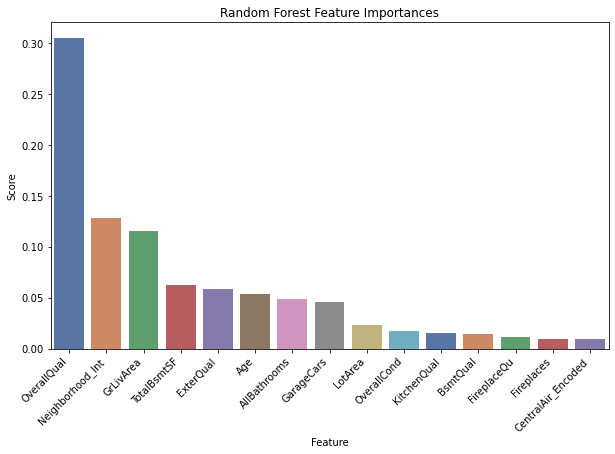

In [346]:
best_forest = grid_search_forest.best_estimator_
best_forest_importances = pd.DataFrame(best_forest.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
best_forest_importances.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)

plt.rcParams['figure.figsize'] = 10,6
x=sns.barplot(x=best_forest_importances.Feature[:15], y=best_forest_importances.Score,palette='deep')
x.set_xticklabels(x.get_xticklabels(),rotation=45,horizontalalignment='right')
x.set(title='Random Forest Feature Importances')

# Boosted Model

score using default parameters (n_estimators=500):
- Train: 0.989 / 0.985 (SalePrice/ logSalePrice)
- Test: 0.928  / 0.920 
- RMSE: 18839 / 0.045 
- note boosted model has worse train but better test accuracy with default params

grid search performed to tune hyperparameters, best params: (both SalePrice and logSalePrice)
- n_estimators = 1000
- learning_rate = 0.0257
- max_depth = 5
- max_features = 25
- subsample = 0.5

best scores:
- Train: 0.996 / 0.994 
- Test: 0.939  / 0.927 
- RMSE: 17458 / 0.043 
- reported logSalePrice model for better comparison to other models, despire SalePrice being ~10% better

In [347]:
gbm = GradientBoostingRegressor()
gbm.set_params(random_state=1,n_estimators=500)

get_score(gbm)

Train Accuracy:  0.9891708803499559
Test Accuracy:  0.9284496487723517


In [348]:
np.sqrt(mean_squared_error(Y_test,gbm.predict(X_test)))

18839.927194911957

In [349]:
get_score_log(gbm)

Train Accuracy (log):  0.9854762923515328
Test Accuracy (log):  0.9199090622191098


In [350]:
np.sqrt(mean_squared_error(Y_test_log,gbm.predict(X_test_log)))

0.045894779228075076

In [192]:
gbm_importances = pd.DataFrame(gbm.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
gbm_importances.rename({'index':'Feature',0:'GBM_Score'},inplace=True, axis=1)
gbm_importances

Feature  GBM_Score
14            OverallQual   0.355381
0               GrLivArea   0.150002
2        Neighborhood_Int   0.144241
19            TotalBsmtSF   0.070688
30           AllBathrooms   0.068090
24             GarageCars   0.036627
20            KitchenQual   0.032733
15            OverallCond   0.028128
1                 LotArea   0.018696
46     CentralAir_Encoded   0.012897
32            FireplaceQu   0.009822
3                     Age   0.008419
44  SaleCondition_Encoded   0.006357
13               BsmtQual   0.005550
36              HeatingQC   0.005477
17           BsmtExposure   0.004579
21             Fireplaces   0.003928
23             GarageCond   0.003821
28            ScreenPorch   0.003194
26             PavedDrive   0.003188
18                   Rate   0.003132
5         RemodSinceBuilt   0.002483
29           BsmtFullBath   0.002423
38    Exterior1st_Encoded   0.001782
16              ExterQual   0.001779
33             Functional   0.001721
27          EnclosedPorch   0.001584
22             GarageQual   0.001451
10           IsOnMainroad   0.001335
34           TotRmsAbvGrd   0.001235
4             StreetAlley   0.001066
37      RoofStyle_Encoded   0.000946
35           BedroomAbvGr   0.000920
25           KitchenAbvGr   0.000763
45     HouseStyle_Encoded   0.000704
41     Foundation_Encoded   0.000703
7             LandContour   0.000574
9               LotConfig   0.000520
40       MSZoning_Encoded   0.000486
31               FullBath   0.000451
12         IsNearRailroad   0.000443
43   GarageFinish_Encoded   0.000381
39       BldgType_Encoded   0.000373
11             IsNearPark   0.000300
6                LotShape   0.000268
8               LandSlope   0.000244
42        Heating_Encoded   0.000113

## SalePrice
Test accuracy was slightly better using SalePrice - was originally used for hyperparameter tuning.

Upon revisting with group, we will be reporting models using logSalePrice for better comparison and noting difference

In [302]:
grid_para_boost = [{
    # 'loss' : ['squared_error','huber'],  #including huber regression made search take >2hrs, had to kill
    'n_estimators': [500,1000,2000],
    'subsample' : [0.5,0.75,1],
    'criterion' : ['friedman_mse'],  #did not change - documentation said this was generally best
    'max_depth' : range(5,25,10),
    'max_features' : range(15,30,5),
    'learning_rate' : np.linspace(0.001,0.1,5)
}]

grid_search_boost = GridSearchCV(gbm, grid_para_boost, scoring='r2', cv=5, n_jobs=-1,return_train_score=True)

%time get_score(grid_search_boost)

Train Accuracy:  0.9958461821872447
Test Accuracy:  0.9385546630454469
CPU times: user 8 s, sys: 431 ms, total: 8.43 s
Wall time: 17min 47s


In [309]:
grid_search_boost.best_score_

0.9354258628903136

In [303]:
grid_search_boost.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.025750000000000002,
 'max_depth': 5,
 'max_features': 25,
 'n_estimators': 1000,
 'subsample': 0.5}

In [352]:
np.sqrt(mean_squared_error(Y_test,grid_search_boost.predict(X_test)))

17458.93709732175

## logSalePrice

Test accuracy was measurably lower, but same best params

In [354]:
grid_para_boost = [{
    # 'loss' : ['squared_error','huber'],  #including huber regression made search take >3hrs, accidentally killed
    'n_estimators': [500,1000,2000],
    'subsample' : [0.5,0.75,1],
    'criterion' : ['friedman_mse'],  #did not change - documentation said this was generally best
    'max_depth' : range(5,25,10),
    'max_features' : range(15,30,5),
    'learning_rate' : np.linspace(0.001,0.1,5)
}]

grid_search_boost = GridSearchCV(gbm, grid_para_boost, scoring='r2', cv=5, n_jobs=-1,return_train_score=True)

%time get_score_log(grid_search_boost)

Train Accuracy (log):  0.9945560225550474
Test Accuracy (log):  0.9286375882988553
CPU times: user 7.74 s, sys: 676 ms, total: 8.42 s
Wall time: 15min 32s


In [355]:
grid_search_boost.best_score_

0.9273011048684502

In [356]:
grid_search_boost.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.025750000000000002,
 'max_depth': 5,
 'max_features': 25,
 'n_estimators': 1000,
 'subsample': 0.5}

In [357]:
np.sqrt(mean_squared_error(Y_test_log,grid_search_boost.predict(X_test_log)))

0.04332178622697761

[Text(0.5, 1.0, 'Boosted Feature Importances')]

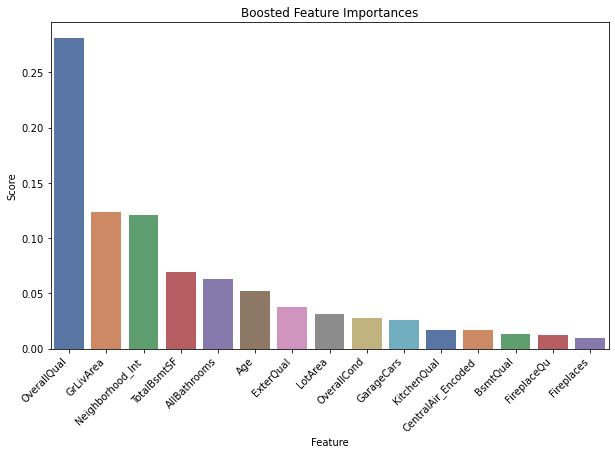

In [358]:
best_boost = grid_search_boost.best_estimator_

best_boost_importances = pd.DataFrame(best_boost.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
best_boost_importances.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)
best_boost_importances

plt.rcParams['figure.figsize'] = 10,6
x=sns.barplot(x=best_boost_importances.Feature[:15], y=best_boost_importances.Score,palette='deep')
x.set_xticklabels(x.get_xticklabels(),rotation=45,horizontalalignment='right')
x.set(title='Boosted Feature Importances')

# Plotting Feature Importances

<AxesSubplot:xlabel='Feature'>

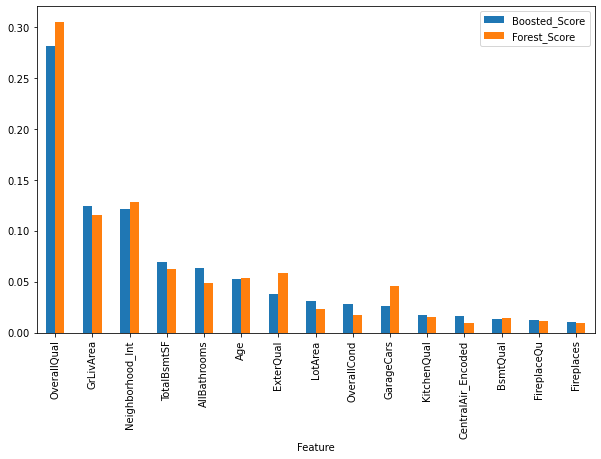

In [395]:
x = best_boost_importances.rename({'Score':'Boosted_Score'},axis=1)
y = best_forest_importances.rename({'Score':'Forest_Score'},axis=1)

plt.rcParams['figure.figsize'] = 10,6
pd.merge(x,y,on='Feature')[:15].plot.bar(x='Feature')

# SVR Model

Note: SVR model requires dummification of categorical values. Furthermore, peformance was quite poor (negative accuracy score for SalePrice, ~64% for logSalePrice) prior to standardizing data. 

score using default parameters:
- Train: 0.946 / 0.951 (SalePrice/logSalePrice)
- Test: 0.880 / 0.852
- RMSE: 28510 / 0.062

grid search performed to tune hyperparameters, best params: (SalePrice)
- C = 37 
- gamma= 0.000941

grid search performed to tune hyperparameters, best params: (logSalePrice)
- C =  1e5
- gamma= 1e-6

best scores:
- Train: 0.972 / 0.928
- Test:  0.936 / 0.922
- RMSE: 17793 / 0.045

In [6]:
#dummify variables
import copy as cp

homes_SVR = homes.copy()

for i in catfeats:
    dummy = pd.get_dummies(homes_SVR[i+'_Encoded'],prefix=i)
    homes_SVR = pd.concat((homes_SVR,dummy),axis=1)
    homes_SVR.drop([i+'_Encoded'],axis=1)
    
homes_SVR.head()    


GrLivArea  LotArea  Neighborhood_Int  Age  StreetAlley  RemodSinceBuilt  \
1        879     5220                 6   70            1               14   
2       1024    13052                 8   41            1                0   
3       1050    10659                11   45            1                0   
4       1142     7733                13    1            1                0   
5       1008    12778                11   54            1               51   

   LotShape  LandContour  LandSlope  LotConfig  IsOnMainroad  IsNearPark  \
1         1            1          0          1             0           0   
2         1            1          0          4             0           0   
3         1            1          0          1             0           0   
4         1            1          0          1             0           0   
5         0            1          0          1             0           0   

   IsNearRailroad  BsmtQual  OverallQual  OverallCond  ExterQual  \
1               0         3            5            3          3   
2               0         3            5            6          3   
3               0         3            5            6          3   
4               0         3            6            5          3   
5               0         3            5            6          3   

   BsmtExposure    Rate  TotalBsmtSF  KitchenQual  Fireplaces  GarageQual  \
1             1  4.4106          830            3           0           3   
2             1  4.4106         1024            3           0           3   
3             1  4.4106         1050            3           0           3   
4             2  4.4106         1142            4           0           0   
5             1  4.4106         1008            3           0           3   

   GarageCond  GarageCars  KitchenAbvGr  PavedDrive  EnclosedPorch  \
1           3           1             1           2              0   
2           3           1             1           3              0   
3           3           1             1           3              0   
4           0           0             1           3              0   
5           3           1             1           3              0   

   ScreenPorch  BsmtFullBath  AllBathrooms  FullBath  FireplaceQu  Functional  \
1            0             0           1.0         1            0           8   
2            0             0           1.5         1            0           8   
3            0             1           2.0         1            0           8   
4            0             0           1.5         1            0           8   
5            0             1           2.0         1            0           8   

   TotRmsAbvGrd  BedroomAbvGr  HeatingQC  RoofStyle_Encoded  \
1             4             2          4                  1   
2             5             3          3                  1   
3             6             3          3                  3   
4             5             3          5                  1   
5             4             2          5                  1   

   Exterior1st_Encoded  BldgType_Encoded  MSZoning_Encoded  \
1                   13                 0                 5   
2                    6                 0                 5   
3                   13                 0                 5   
4                   12                 0                 5   
5                    8                 0                 5   

   Foundation_Encoded  Heating_Encoded  GarageFinish_Encoded  \
1                   0                1                     3   
2                   1                1                     3   
3                   1                1                     3   
4                   2                1                     1   
5                   1                1                     2   

   SaleCondition_Encoded  HouseStyle_Encoded  CentralAir_Encoded  RoofStyle_0  \
1                      4                   2                   1            0  

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(homes_SVR, prices, random_state=0, test_size=0.3)
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(homes_SVR, logprices, random_state=0, test_size=0.3)

In [8]:
svr = SVR()
svr.set_params(kernel='rbf')

SVR()

In [406]:
get_score(svr)

Train Accuracy:  -0.0637199241066464
Test Accuracy:  -0.06385734029237544


In [35]:
get_score_log(svr)

Train Accuracy (log):  0.6870959967317092
Test Accuracy (log):  0.6762581298972461


In [38]:
np.sqrt(mean_squared_error(Y_test_log,svr.predict(X_test_log)))

0.09227223310356034

Results are quite poor before standardizing!

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

sc_x2 = StandardScaler()
sc_y2 = StandardScaler()

sc_x3 = StandardScaler()
sc_y3 = StandardScaler()

sc_x4 = StandardScaler()
sc_y4 = StandardScaler()

X_train = sc_x3.fit_transform(X_train)
Y_train = sc_y3.fit_transform(np.array(Y_train).reshape(-1,1))
X_test = sc_x4.fit_transform(X_test)
Y_test = sc_y4.fit_transform(np.array(Y_test).reshape(-1,1))

X_train_log = sc_x.fit_transform(X_train_log)
Y_train_log = sc_y.fit_transform(np.array(Y_train_log).reshape(-1,1))
X_test_log = sc_x2.fit_transform(X_test_log)
Y_test_log = sc_y2.fit_transform(np.array(Y_test_log).reshape(-1,1))

# 3/13/22 - noticed I had applied sc_y to all vars, probably not right implementation

In [10]:
get_score(svr)

Train Accuracy:  0.9464870111736088
Test Accuracy:  0.8797034410323791


In [17]:
np.sqrt(mean_squared_error(sc_y4.inverse_transform(Y_test),sc_y4.inverse_transform(svr.predict(X_test).reshape(-1,1))))

28510.948500561564

In [11]:
get_score_log(svr)

Train Accuracy (log):  0.9510109380831445
Test Accuracy (log):  0.8517088195978583


In [16]:
np.sqrt(mean_squared_error(sc_y2.inverse_transform(Y_test_log),sc_y2.inverse_transform(svr.predict(X_test_log).reshape(-1,1))))

0.06244954187249559

## SalePrice

In [33]:
grid_para_svr = {
    # 'C':np.linspace(1,100,20),
    'C':np.logspace(-4,4,20),
    'gamma':np.linspace(1e-4,1e-2,10)
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True,n_jobs=-1)

%time grid_search_svr.fit(X_train,np.ravel(Y_train))

CPU times: user 3.43 s, sys: 308 ms, total: 3.74 s
Wall time: 2min 27s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'gamma': array([0.0001, 0.0012, 0.0023, 0.0034, 0.0045, 0.0056, 0.0067, 0.0078,
       0.0089, 0.01  ])},
             return_train_score=True)

In [34]:
grid_search_svr.best_params_

{'C': 29.763514416313132, 'gamma': 0.0012000000000000001}

In [35]:
best_svr = grid_search_svr.best_estimator_

get_score(best_svr)

Train Accuracy:  0.9732613484981116
Test Accuracy:  0.9345609767842835


In [36]:
np.sqrt(mean_squared_error(sc_y4.inverse_transform(Y_test),sc_y4.inverse_transform(best_svr.predict(X_test).reshape(-1,1))))

18017.384191189114

First grid search greatly improved results, test especially! Attempting one more to see if there is any improvement.

In [19]:
grid_para_svr = {
    'C': range(28,40),
    'gamma':np.linspace(1.5e-4,1.5e-3,30)
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True,n_jobs=-1)

%time grid_search_svr.fit(X_train,np.ravel(Y_train))

CPU times: user 9.91 s, sys: 791 ms, total: 10.7 s
Wall time: 5min 8s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': range(28, 40),
                         'gamma': array([0.00015   , 0.00019655, 0.0002431 , 0.00028966, 0.00033621,
       0.00038276, 0.00042931, 0.00047586, 0.00052241, 0.00056897,
       0.00061552, 0.00066207, 0.00070862, 0.00075517, 0.00080172,
       0.00084828, 0.00089483, 0.00094138, 0.00098793, 0.00103448,
       0.00108103, 0.00112759, 0.00117414, 0.00122069, 0.00126724,
       0.00131379, 0.00136034, 0.0014069 , 0.00145345, 0.0015    ])},
             return_train_score=True)

In [20]:
grid_search_svr.best_params_

{'C': 39, 'gamma': 0.0009413793103448276}

In [21]:
best_svr = grid_search_svr.best_estimator_

get_score(best_svr)

Train Accuracy:  0.9717761995244063
Test Accuracy:  0.9361745899414056


In [23]:
grid_search_svr.best_score_

0.9283725837818624

In [22]:
np.sqrt(mean_squared_error(sc_y4.inverse_transform(Y_test),sc_y4.inverse_transform(best_svr.predict(X_test).reshape(-1,1))))

17793.85888405077

## logSalePrice

In [24]:
grid_para_svr = {
    'C':np.linspace(1,100,20),
    'gamma':np.linspace(1e-4,1e-2,10)
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True,n_jobs=-1)

%time grid_search_svr.fit(X_train_log,np.ravel(Y_train_log))

CPU times: user 3.55 s, sys: 375 ms, total: 3.93 s
Wall time: 2min 18s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ]),
                         'gamma': array([0.0001, 0.0012, 0.0023, 0.0034, 0.0045, 0.0056, 0.0067, 0.0078,
       0.0089, 0.01  ])},
             return_train_score=True)

In [25]:
grid_search_svr.best_params_

{'C': 100.0, 'gamma': 0.0001}

In [26]:
best_svr = grid_search_svr.best_estimator_

get_score(best_svr)

Train Accuracy:  0.9264353221946067
Test Accuracy:  0.9175143002516667


In [27]:
np.sqrt(mean_squared_error(sc_y2.inverse_transform(Y_test_log),sc_y2.inverse_transform(best_svr.predict(X_test_log).reshape(-1,1))))

0.05355628280196067

First grid search greatly improved results, test especially! Attempting one more to see if there is any improvement.

In [420]:
grid_para_svr = {
    'C': np.linspace(1,1e5,10),
    'gamma':np.linspace(1e-5,1.5e-4,30)
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True,n_jobs=-1)

%time grid_search_svr.fit(X_train_log,np.ravel(Y_train_log))

CPU times: user 6.25 s, sys: 624 ms, total: 6.87 s
Wall time: 2h 10s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([1.0000e+00, 1.1112e+04, 2.2223e+04, 3.3334e+04, 4.4445e+04,
       5.5556e+04, 6.6667e+04, 7.7778e+04, 8.8889e+04, 1.0000e+05]),
                         'gamma': array([1.00000000e-05, 1.48275862e-05, 1.96551724e-05, 2.44827586e-05,
       2.93103448e-05, 3.41379310e-05, 3.89655172e-05, 4.37931034e-05,
       4.86206897e-05, 5.34482759e-05, 5.82758621e-05, 6.31034483e-05,
       6.79310345e-05, 7.27586207e-05, 7.75862069e-05, 8.24137931e-05,
       8.72413793e-05, 9.20689655e-05, 9.68965517e-05, 1.01724138e-04,
       1.06551724e-04, 1.11379310e-04, 1.16206897e-04, 1.21034483e-04,
       1.25862069e-04, 1.30689655e-04, 1.35517241e-04, 1.40344828e-04,
       1.45172414e-04, 1.50000000e-04])},
             return_train_score=True)

In [421]:
grid_search_svr.best_params_

{'C': 11112.0, 'gamma': 1e-05}

In [426]:
best_svr = grid_search_svr.best_estimator_
get_score_log(best_svr)

Train Accuracy (log):  0.9278350312517647
Test Accuracy (log):  0.9219447142478046


In [28]:
grid_para_svr = {
    'C': [1,1e5,1e10],
    'gamma':[1e-15,1e-12,1e-9,1e-6,1e-3]
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True,n_jobs=-1)

%time grid_search_svr.fit(X_train_log,np.ravel(Y_train_log))

CPU times: user 1.78 s, sys: 39.5 ms, total: 1.82 s
Wall time: 1min 23s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 100000.0, 10000000000.0],
                         'gamma': [1e-15, 1e-12, 1e-09, 1e-06, 0.001]},
             return_train_score=True)

In [29]:
grid_search_svr.best_params_

{'C': 100000.0, 'gamma': 1e-06}

In [30]:
best_svr = grid_search_svr.best_estimator_
get_score_log(best_svr)

Train Accuracy (log):  0.9278350312517647
Test Accuracy (log):  0.9219447142478046


In [31]:
np.sqrt(mean_squared_error(sc_y2.inverse_transform(Y_test_log),sc_y2.inverse_transform(best_svr.predict(X_test_log).reshape(-1,1))))

0.04530777703664265

- below was run without standardizing y

In [13]:
grid_para_svr = {
    'C': [1,1e5,1e10],
    'gamma':[1e-15,1e-12,1e-9,1e-6,1e-3]
}

grid_search_svr = GridSearchCV(svr, grid_para_svr, cv=5, return_train_score = True,n_jobs=-1)

%time grid_search_svr.fit(X_train_log,np.ravel(Y_train_log))

CPU times: user 573 ms, sys: 158 ms, total: 731 ms
Wall time: 1min 21s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 100000.0, 10000000000.0],
                         'gamma': [1e-15, 1e-12, 1e-09, 1e-06, 0.001]},
             return_train_score=True)

In [14]:
grid_search_svr.best_params_

{'C': 100000.0, 'gamma': 1e-06}

In [15]:
best_svr = grid_search_svr.best_estimator_
get_score_log(best_svr)

Train Accuracy (log):  0.9137085376056585
Test Accuracy (log):  0.8965102206823785


In [16]:
np.sqrt(mean_squared_error(Y_test_log,best_svr.predict(X_test_log)))

0.0521699386593347